In [24]:
import pandas as pd
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from landaupy import landau
from scipy.optimize import curve_fit

import analysis_data

In [79]:

import process_data
path_save = 'outnpy/LED_20240821_20240826_runinfo.h5py'
df = pd.DataFrame(run_info)
#process_data.write_to_hdf5(df, path_save)


In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.errorbar(df_larger_area_updated.Ch0_Area_mu, ratio, xerr=df_larger_area_updated.Ch0_Area_sigma, yerr=ratio_err, fmt='o',  capsize=5, elinewidth=2, capthick=2, label='Ratio')
ax.errorbar(df_larger_area_updated.Ch0_Area_mu[-9:-6], ratio[-9:-6], xerr=df_larger_area_updated.Ch0_Area_sigma[-9:-6], yerr=ratio_err[-9:-6], fmt='o', ecolor='red',  capsize=5, elinewidth=2, capthick=2, label='led100ns attenuator 9DB')
ax.errorbar(df_larger_area_updated.Ch0_Area_mu[-6:], ratio[-6:], xerr=df_larger_area_updated.Ch0_Area_sigma[-6:], yerr=ratio_err[-6:], fmt='o', ecolor='blue',  capsize=5, elinewidth=2, capthick=2, label='led100ns attenuator 9DB')
ax.set_xlabel('LV2414 Anode (Ch0) Area [PE]')
ax.set_ylabel('LV2414 Anode(Ch0) to LV2415 Anode(Ch1) Ratio')
ax.set_title('LV2414 Anode to LV2415 Anode (with filter) Ratio vs LV2414 Anode Area ')
#for index, row in df_larger_area_updated.iterrows():
#    for column_name, value in row.items(): 
#        ax.text(df_larger_area_updated['Ch0_Area_mu'][index], df_larger_area_updated['Ratio_fit_mu'][index] , s= str(df_larger_area_updated['file_tag'][index]), rotation='vertical', color='blue')  #rotation='vertical'   rotation='horizontal'  
ax.legend()
ax.grid()
ax.set_ylim(-50, 200)
#ax.set_xlim(0, 1000)
#plt.savefig(r'./figs/LV2414_anode_to_LV2415_anode_Ratio_use_Gaussian_fit_combined_20240821_20240826_20240829_allruns.png',dpi=300)
plt.show()

In [ ]:
gain_ratio = df_larger_area_updated.Ch0_Area_mu / df_larger_area_updated.Ch2_Area_mu
gain_ratio_err = gain_ratio * np.sqrt((df_larger_area_updated.Ch0_Area_sigma/df_larger_area_updated.Ch0_Area_mu)**2 + (df_larger_area_updated.Ch2_Area_sigma/df_larger_area_updated.Ch2_Area_mu)**2)

fig, ax = plt.subplots(figsize=(12,8))
ax.errorbar(df_larger_area_updated.Ch0_Area_mu, gain_ratio, xerr=df_larger_area_updated.Ch0_Area_sigma, yerr=gain_ratio_err, fmt='o',  capsize=5, elinewidth=2, capthick=2, label='Ratio')
ax.errorbar(df_larger_area_updated.Ch0_Area_mu[-9:-6], gain_ratio[-9:-6], xerr=df_larger_area_updated.Ch0_Area_sigma[-9:-6], yerr=gain_ratio_err[-9:-6], fmt='o', ecolor='red',  capsize=5, elinewidth=2, capthick=2, label='led100ns attenuator 9DB')
ax.errorbar(df_larger_area_updated.Ch0_Area_mu[-6:], gain_ratio[-6:], xerr=df_larger_area_updated.Ch0_Area_sigma[-6:], yerr=gain_ratio_err[-6:], fmt='o', ecolor='blue',  capsize=5, elinewidth=2, capthick=2, label='led100ns attenuator 9DB')
ax.set_xlabel('LV2415 Anode Area(Ch0) [PE]')
ax.set_ylabel('Gain Ratio From LV2415 Anode to Dynode')
ax.set_title('LV2415 Anode to dynode 7 Ratio vs Anode (Ch0) Area')
#for index, row in df_larger_area_updated.iterrows():
#    for column_name, value in row.items(): 
#        ax.text(df_larger_area_updated['Ch0_Area_mu'][index], df_larger_area_updated['Ratio_fit_mu'][index] , s= str(df_larger_area_updated['file_tag'][index]), rotation='vertical', color='blue')  #rotation='vertical'   rotation='horizontal'  
ax.legend()
ax.grid()
ax.set_ylim(0, 150)
#ax.set_xlim(0, 1000)
#plt.savefig(r'./figs/LV2414_Anode_to_Dynode_Gain_Ratio_vs_anode_Area_use_Gaussian_fit_combined_20240821_20240826_allruns.png',dpi=300)
plt.show()

In [143]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
# from landaupy import landau
# from scipy.optimize import curve_fit

import analysis_data
import process_data
import pandas as pd
df_path = 'outnpy/df_100ns_900mv_20240924_backup.h5py'
df = pd.read_hdf(df_path, key='winfo')
df_path_0 = 'outnpy/df_100ns_900mv_9DB_20240904_20240920_tmp.h5py'
df0 = pd.read_hdf(df_path_0, key='winfo')

In [144]:
ratio = df.Ch0_Area_mu / df.Ch1_Area_mu 
ratio_err = ratio*np.sqrt((df.Ch0_Area_sigma/df.Ch0_Area_mu)**2 + (df.Ch1_Area_sigma/df.Ch1_Area_mu)**2)

ratio_0 = df0.Ch0_Area_mu / df0.Ch1_Area_mu 
ratio_err_0 = ratio_0*np.sqrt((df0.Ch0_Area_sigma/df0.Ch0_Area_mu)**2 + (df0.Ch1_Area_sigma/df0.Ch1_Area_mu)**2)

<function matplotlib.pyplot.show(close=None, block=None)>

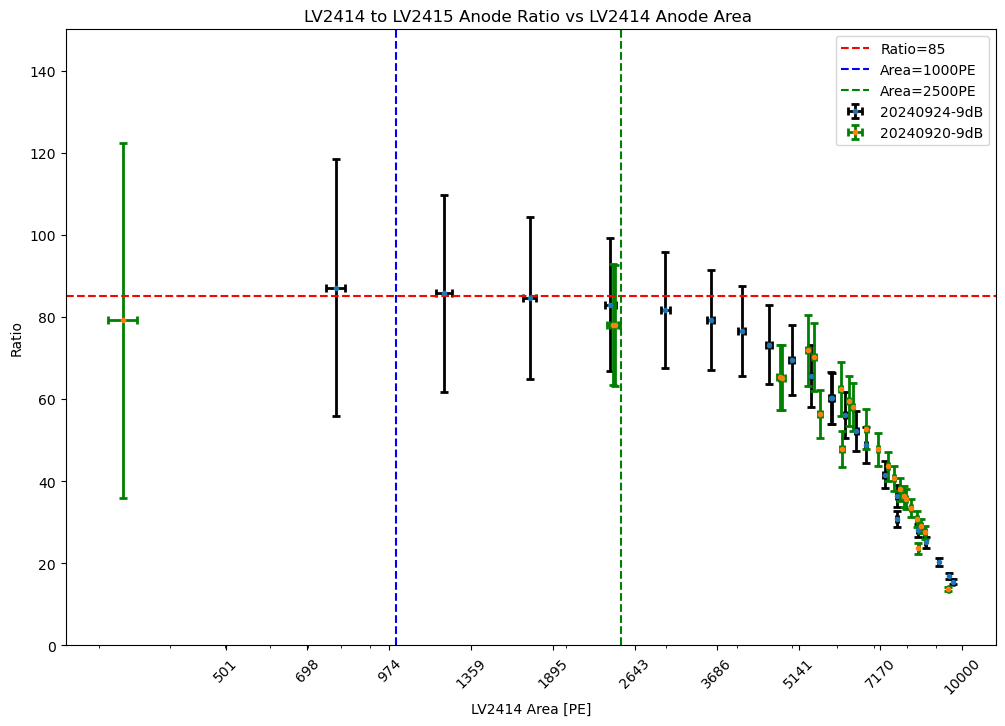

In [145]:
fig, ax = plt.subplots(figsize=(12,8))
ax.errorbar(df.Ch0_Area_mu, ratio, xerr=df.Ch0_Area_sigma, yerr=ratio_err, fmt='.', ecolor='black', capsize=3, elinewidth=2, capthick=2, label='20240924-9dB')
ax.errorbar(df0.Ch0_Area_mu, ratio_0, xerr=df0.Ch0_Area_sigma, yerr=ratio_err_0, fmt='.', ecolor='g', capsize=3, elinewidth=2, capthick=2, label='20240920-9dB')
ax.set_xlabel('LV2414 Area [PE]')
ax.set_ylabel('Ratio')
ax.set_title('LV2414 to LV2415 Anode Ratio vs LV2414 Anode Area ')
ax.set_xscale('log')
ax.axhline(y=85., color='r', linestyle='--', label='Ratio=85')
ax.axvline(x=1000, color='b', linestyle='--', label='Area=1000PE')
# ax.axvline(x=10000, color='b', linestyle='--', label='Area=10000PE')
ax.axvline(x=2500, color='g', linestyle='--', label='Area=2500PE')
ax.legend(loc='upper right')
ax.set_xticks(np.logspace(2.7, 4, 10))
ax.set_xticklabels(np.logspace(2.7, 4, 10).astype(int), rotation=45)
#ax.grid()
ax.set_ylim(0, 150)
#ax.set_xlim(0, 1000)
plt.savefig(r'./figs/LV2414_LV2415_anode_Ratio_use_Gaussian_fit_20240924_.png', bbox_inches='tight', dpi=300)
plt.show

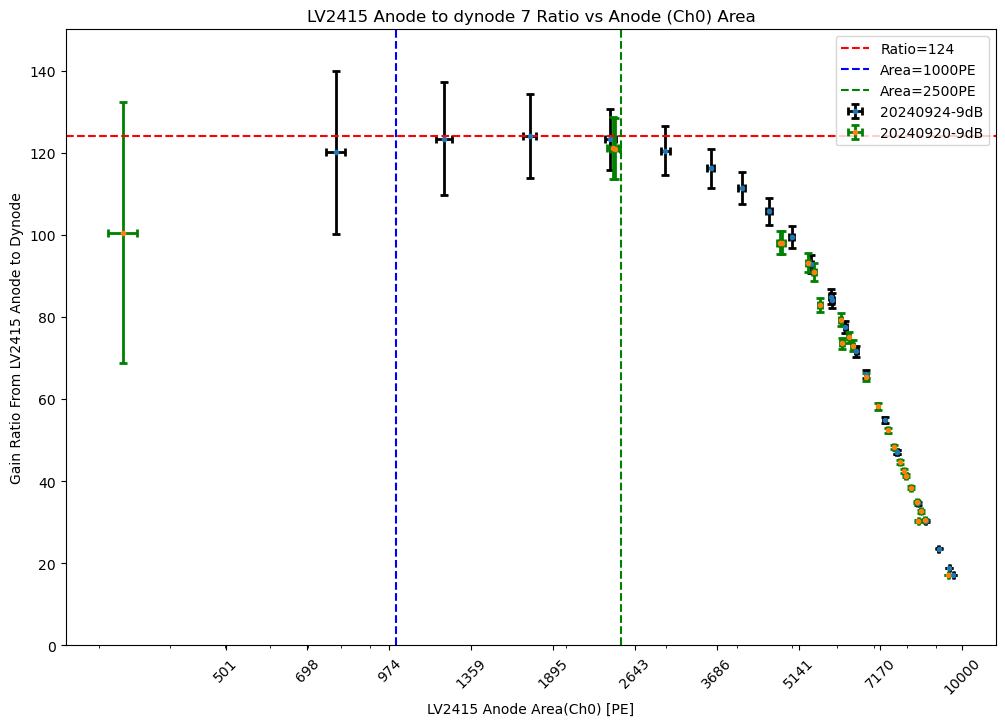

In [146]:
gain_ratio = df.Ch0_Area_mu / df.Ch2_Area_mu
gain_ratio_err = gain_ratio * np.sqrt((df.Ch0_Area_sigma/df.Ch0_Area_mu)**2 + (df.Ch2_Area_sigma/df.Ch2_Area_mu)**2)

gain_ratio_0 = df0.Ch0_Area_mu / df0.Ch2_Area_mu
gain_ratio_err_0 = gain_ratio_0 * np.sqrt((df0.Ch0_Area_sigma/df0.Ch0_Area_mu)**2 + (df0.Ch2_Area_sigma/df0.Ch2_Area_mu)**2)


fig, ax = plt.subplots(figsize=(12,8))
ax.errorbar(df.Ch0_Area_mu, gain_ratio, xerr=df.Ch0_Area_sigma, yerr=gain_ratio_err, fmt='.', ecolor='black', capsize=3, elinewidth=2, capthick=2, label='20240924-9dB')
ax.errorbar(df0.Ch0_Area_mu, gain_ratio_0, xerr=df0.Ch0_Area_sigma, yerr=gain_ratio_err_0, fmt='.', ecolor='g', capsize=3, elinewidth=2, capthick=2, label='20240920-9dB')
ax.set_xlabel('LV2415 Anode Area(Ch0) [PE]')
ax.set_ylabel('Gain Ratio From LV2415 Anode to Dynode')
ax.set_title('LV2415 Anode to dynode 7 Ratio vs Anode (Ch0) Area')
ax.set_xscale('log')
ax.axhline(y=124., color='r', linestyle='--', label='Ratio=124')
ax.axvline(x=1000, color='b', linestyle='--', label='Area=1000PE')
ax.axvline(x=2500, color='g', linestyle='--', label='Area=2500PE')
ax.legend(loc='upper right')
ax.set_xticks(np.logspace(2.7, 4, 10))
ax.set_xticklabels(np.logspace(2.7, 4, 10).astype(int), rotation=45)
# ax.grid()
ax.set_ylim(0, 150)
#ax.set_xlim(0, 1000)
plt.savefig(r'./figs/LV2414_Anode_to_Dynode_Gain_Ratio_20240924.png',  bbox_inches='tight',  dpi=300)
plt.show()

In [147]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
# from landaupy import landau
# from scipy.optimize import curve_fit

import analysis_data
import process_data
import pandas as pd
df_path = 'outnpy/df_100ns_900mv_20240924_backup.h5py'
df = pd.read_hdf(df_path, key='winfo')

In [148]:
df = df.eval('Gain_Ratio = Ch0_Area_mu / Ch2_Area_mu')
df.sort_values(by='Ch0_Area_mu')

,Ch0_Area_mu,Ch0_Area_sigma,Ch1_Area_mu,Ch1_Area_sigma,Ch2_Area_mu,Ch2_Area_sigma,Ratio_fit_mu,Ratio_fit_sigma,file_tag,Gain_Ratio
8,784.448286,31.079364,9.001924,3.215555,6.530890,1.045959,87.142293,31.318763,20240924_950mv_900mv_100ns_attenuator_9DB,120.113532
6,1216.805413,38.637041,14.196193,3.954167,9.859086,1.058253,85.713503,24.029028,20240924_965mv_900mv_100ns_attenuator_9DB,123.419699
7,1724.577599,45.655745,20.392685,4.720816,13.893644,1.082363,84.568442,19.704820,20240924_980mv_900mv_100ns_attenuator_9DB,124.127089
9,2391.849657,52.240849,28.820353,5.612226,19.405815,1.099492,82.991684,16.262418,20240924_1.000V_900mv_100ns_attenuator_9DB,123.254274
5,2991.136207,55.689459,36.610339,6.293250,24.826213,1.142458,81.701954,14.126553,20240924_1.010V_900mv_100ns_attenuator_9DB,120.482985
4,3597.306024,56.670779,45.397648,6.988979,30.966531,1.173257,79.239921,12.262710,20240924_1.020V_900mv_100ns_attenuator_9DB,116.167549
3,4082.233209,56.095315,53.324819,7.580448,36.649350,1.203854,76.554094,10.933355,20240924_1.030V_900mv_100ns_attenuator_9DB,111.386239
1,4558.733190,54.319974,62.234172,8.161690,43.141526,1.231217,73.251287,9.646099,20240924_1.040V_900mv_100ns_attenuator_9DB,105.669261
0,4996.692712,51.831023,71.831750,8.732552,50.218766,1.262149,69.561061,8.487233,20240924_1.050V_900mv_100ns_attenuator_9DB,99.498517
2,5409.963700,48.787700,82.514968,9.412742,58.293035,1.300190,65.563422,7.502361,20240924_1.060V_900mv_100ns_attenuator_9DB,92.806348


In [149]:
Ratio_of_filter = np.mean(df.Ratio_fit_mu[df.Ch0_Area_mu < 4000])
Ratio_of_filter_err =  np.std(df.Ratio_fit_mu[df.Ch0_Area_mu < 4000]) 
Gain_ratio_mu = np.mean(df.Gain_Ratio[df.Ch0_Area_mu < 4000])
Gain_ratio_err =  np.std(df.Gain_Ratio[df.Ch0_Area_mu < 4000]) 
Ratio_of_filter, Ratio_of_filter_err, Gain_ratio_mu, Gain_ratio_err

(83.55963261815212, 2.611696693187247, 121.26085465658046, 2.729860386508014)

In [150]:
dynode_fix = df.Ch2_Area_mu * Gain_ratio_mu
dynode_fix_err = dynode_fix * np.sqrt((df.Ch2_Area_sigma/df.Ch2_Area_mu)**2 + (Gain_ratio_err/Gain_ratio_mu)**2)
filter_fix = df.Ch1_Area_mu * Ratio_of_filter
filter_fix_err = filter_fix * np.sqrt((df.Ch1_Area_sigma/df.Ch1_Area_mu)**2 + (Ratio_of_filter_err/Ratio_of_filter)**2)

In [151]:
df['dynode_fix'] = dynode_fix
df['dynode_fix_err'] = dynode_fix_err
df['filter_fix'] = filter_fix
df['filter_fix_err'] = filter_fix_err

In [152]:
df.head()

,Ch0_Area_mu,Ch0_Area_sigma,Ch1_Area_mu,Ch1_Area_sigma,Ch2_Area_mu,Ch2_Area_sigma,Ratio_fit_mu,Ratio_fit_sigma,file_tag,Gain_Ratio,dynode_fix,dynode_fix_err,filter_fix,filter_fix_err
0,4996.692712,51.831023,71.831750,8.732552,50.218766,1.262149,69.561061,8.487233,20240924_1.050V_900mv_100ns_attenuator_9DB,99.498517,6089.570477,205.469749,6002.234638,753.419240
1,4558.733190,54.319974,62.234172,8.161690,43.141526,1.231217,73.251287,9.646099,20240924_1.040V_900mv_100ns_attenuator_9DB,105.669261,5231.378313,190.157504,5200.264566,701.088900
2,5409.963700,48.787700,82.514968,9.412742,58.293035,1.300190,65.563422,7.502361,20240924_1.060V_900mv_100ns_attenuator_9DB,92.806348,7068.663232,224.009617,6894.920423,815.514580
3,4082.233209,56.095315,53.324819,7.580448,36.649350,1.203854,76.554094,10.933355,20240924_1.030V_900mv_100ns_attenuator_9DB,111.386239,4444.131445,176.973987,4455.802276,648.549002
4,3597.306024,56.670779,45.397648,6.988979,30.966531,1.173257,79.239921,12.262710,20240924_1.020V_900mv_100ns_attenuator_9DB,116.167549,3755.028038,165.489733,3793.410785,595.910742


In [153]:
# for index, row in df.iterrows():
#     tmp1 =(row.Ch2_Area_sigma/row.Ch2_Area_mu)**2
#     tmp2 = (row.Ch1_Area_sigma/row.Ch1_Area_mu)**2
#     dynode_fix_err.append( row.dynode_fix * np.sqrt( tmp1**2 + (Gain_ratio_err/Gain_ratio_mu)**2) )
#     filter_fix_err.append( row.filter_fix * np.sqrt( tmp2**2+ (Ratio_of_filter_err/Ratio_of_filter)**2) )

In [154]:
yerr_dynode_fix = df.Ch0_Area_mu/df.dynode_fix *np.sqrt(df.Ch0_Area_sigma**2/df.Ch0_Area_mu**2 + df.dynode_fix_err**2/df.dynode_fix**2)
yerr_filter_fix = df.Ch0_Area_mu/df.filter_fix *np.sqrt(df.Ch0_Area_sigma**2/df.Ch0_Area_mu**2 + df.filter_fix_err**2/df.filter_fix**2)
df['yerr_dynode_fix'] = yerr_dynode_fix
df['yerr_filter_fix'] = yerr_filter_fix

In [155]:
yerr_filter_dynode = df.filter_fix/df.dynode_fix * np.sqrt((df.filter_fix_err/df.filter_fix)**2 + (df.dynode_fix_err/df.dynode_fix)**2)

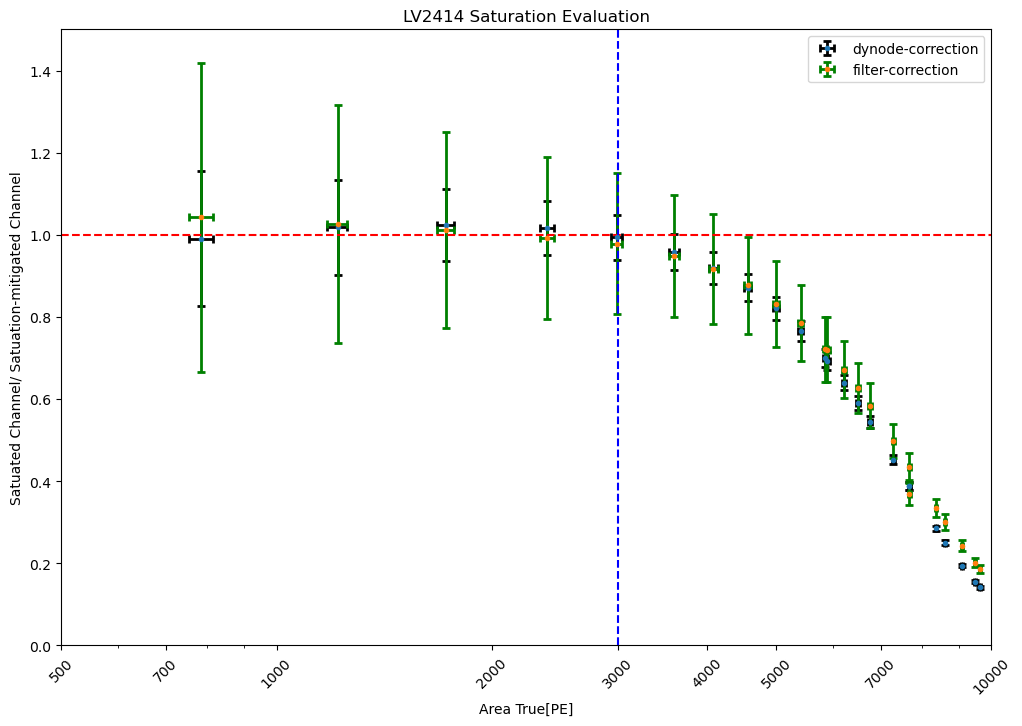

In [156]:

fig, ax = plt.subplots(figsize=(12,8))
ax.errorbar(df.Ch0_Area_mu, df.Ch0_Area_mu/df.dynode_fix, xerr=df.Ch0_Area_sigma, yerr=yerr_dynode_fix, fmt='.', ecolor='black', capsize=3, elinewidth=2, capthick=2, label='dynode-correction')
ax.errorbar(df.Ch0_Area_mu , df.Ch0_Area_mu/df.filter_fix, xerr=df.Ch0_Area_sigma, yerr=yerr_filter_fix, fmt='.', ecolor='g', capsize=3, elinewidth=2, capthick=2, label='filter-correction')
ax.set_xlabel('Area True[PE]')
ax.set_ylabel('Satuated Channel/ Satuation-mitigated Channel')
ax.set_title('')
ax.set_xscale('log')
ax.axhline(y=1., color='r', linestyle='--')
# ax.axvline(x=600, color='b', linestyle='--', label='Area=600PE')
# ax.axvline(x=1000, color='b', linestyle='--', label='Area=1000PE')
ax.axvline(x=3000, color='b', linestyle='--') 
ax.legend(loc='upper right')
ax.set_xticks([500, 700, 1000, 2000, 3000, 4000, 5000, 7000, 10000])
ax.set_xticklabels([500, 700, 1000, 2000, 3000, 4000, 5000, 7000,10000], rotation=45)
#ax.set_xticks(np.logspace(2, 4, 10+4))
#ax.set_xticklabels(np.logspace(2, 4, 10+4).astype(int), rotation=45)
# ax.grid()
ax.set_ylim(0, 1.5)
ax.set_xlim(500, 10000)
ax.set_title('LV2414 Saturation Evaluation')
#plt.savefig(r'./figs/LV2414_saturation_eval_20240924.png',  bbox_inches='tight',  dpi=300)
# tick_positions = plt.xticks()[0]
# tick_positions_to_show = tick_positions[:10]  # 只取前15个位置作为展示的刻度位置
# plt.gca().set_xticks(tick_positions_to_show)  # 设置这些位置为刻度位置
plt.show()

In [157]:
df.sort_values(by='filter_fix', inplace=True)
df

,Ch0_Area_mu,Ch0_Area_sigma,Ch1_Area_mu,Ch1_Area_sigma,Ch2_Area_mu,Ch2_Area_sigma,Ratio_fit_mu,Ratio_fit_sigma,file_tag,Gain_Ratio,dynode_fix,dynode_fix_err,filter_fix,filter_fix_err,yerr_dynode_fix,yerr_filter_fix
8,784.448286,31.079364,9.001924,3.215555,6.530890,1.045959,87.142293,31.318763,20240924_950mv_900mv_100ns_attenuator_9DB,120.113532,791.941327,128.080744,752.197447,269.717184,0.164937,0.376222
6,1216.805413,38.637041,14.196193,3.954167,9.859086,1.058253,85.713503,24.029028,20240924_965mv_900mv_100ns_attenuator_9DB,123.419699,1195.521179,131.116614,1186.228660,332.482488,0.116210,0.289349
7,1724.577599,45.655745,20.392685,4.720816,13.893644,1.082363,84.568442,19.704820,20240924_980mv_900mv_100ns_attenuator_9DB,124.127089,1684.755155,136.618518,1704.005271,398.048880,0.087319,0.237930
9,2391.849657,52.240849,28.820353,5.612226,19.405815,1.099492,82.991684,16.262418,20240924_1.000V_900mv_100ns_attenuator_9DB,123.254274,2353.165732,143.464293,2408.218146,474.957798,0.065825,0.197081
5,2991.136207,55.689459,36.610339,6.293250,24.826213,1.142458,81.701954,14.126553,20240924_1.010V_900mv_100ns_attenuator_9DB,120.482985,3010.447760,154.224260,3059.146465,534.483626,0.054158,0.171800
4,3597.306024,56.670779,45.397648,6.988979,30.966531,1.173257,79.239921,12.262710,20240924_1.020V_900mv_100ns_attenuator_9DB,116.167549,3755.028038,165.489733,3793.410785,595.910742,0.044837,0.149717
3,4082.233209,56.095315,53.324819,7.580448,36.649350,1.203854,76.554094,10.933355,20240924_1.030V_900mv_100ns_attenuator_9DB,111.386239,4444.131445,176.973987,4455.802276,648.549002,0.038696,0.133942
1,4558.733190,54.319974,62.234172,8.161690,43.141526,1.231217,73.251287,9.646099,20240924_1.040V_900mv_100ns_attenuator_9DB,105.669261,5231.378313,190.157504,5200.264566,701.088900,0.033334,0.118647
0,4996.692712,51.831023,71.831750,8.732552,50.218766,1.262149,69.561061,8.487233,20240924_1.050V_900mv_100ns_attenuator_9DB,99.498517,6089.570477,205.469749,6002.234638,753.419240,0.028965,0.104851
2,5409.963700,48.787700,82.514968,9.412742,58.293035,1.300190,65.563422,7.502361,20240924_1.060V_900mv_100ns_attenuator_9DB,92.806348,7068.663232,224.009617,6894.920423,815.514580,0.025217,0.093074


In [158]:
# path = 'outnpy/df_fixed_area_vs_dynode_filter_20240924.h5py'
# process_data.write_to_hdf5(df, path)

In [159]:
yerr_dynode_filter = df.dynode_fix/df.filter_fix * np.sqrt((df.filter_fix_err/df.filter_fix)**2 + (df.dynode_fix_err/df.dynode_fix)**2)
yerr_anode_filter = df.Ch0_Area_mu/df.filter_fix * np.sqrt((df.Ch0_Area_sigma/df.Ch0_Area_mu)**2 + (df.filter_fix_err/df.filter_fix)**2)

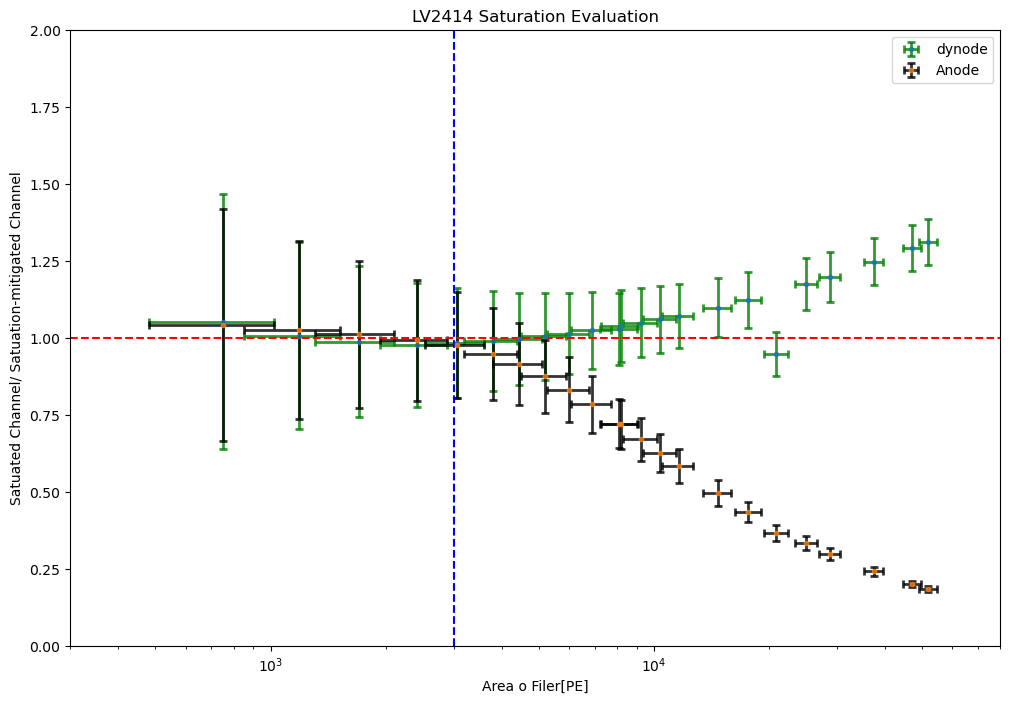

In [160]:

fig, ax = plt.subplots(figsize=(12,8))
ax.errorbar(df.filter_fix, df.dynode_fix/df.filter_fix, xerr=df.filter_fix_err, yerr=yerr_dynode_filter, fmt='.', ecolor='green',alpha=0.8, capsize=3, elinewidth=2, capthick=2, label='dynode')
ax.errorbar(df.filter_fix , df.Ch0_Area_mu/df.filter_fix, xerr=df.filter_fix_err, yerr=yerr_anode_filter, fmt='.', ecolor='black', alpha=0.8, capsize=3, elinewidth=2, capthick=2, label='Anode')
ax.set_xlabel('Area o Filer[PE]')
ax.set_ylabel('Satuated Channel/ Satuation-mitigated Channel')
ax.set_title('')
ax.set_xscale('log')
ax.axhline(y=1., color='r', linestyle='--')
# ax.axvline(x=600, color='b', linestyle='--', label='Area=600PE')
# ax.axvline(x=1000, color='b', linestyle='--', label='Area=1000PE')
ax.axvline(x=3000, color='b', linestyle='--') 
ax.legend(loc='upper right')
#ax.set_xticks([500, 700, 1000, 2000, 3000, 4000, 5000, 7000, 10000])
#ax.set_xticklabels([500, 700, 1000, 2000, 3000, 4000, 5000, 7000,10000], rotation=45)
#ax.set_xticks(np.logspace(2, 4, 10+4))
#ax.set_xticklabels(np.logspace(2, 4, 10+4).astype(int), rotation=45)
# ax.grid()
ax.set_ylim(0, 2)
ax.set_xlim(300, 80000)
ax.set_title('LV2414 Saturation Evaluation')
#plt.savefig(r'./figs/LV2414_saturation_eval_20240924.png',  bbox_inches='tight',  dpi=300)
# tick_positions = plt.xticks()[0]
# tick_positions_to_show = tick_positions[:10]  # 只取前15个位置作为展示的刻度位置
# plt.gca().set_xticks(tick_positions_to_show)  # 设置这些位置为刻度位置
plt.show()

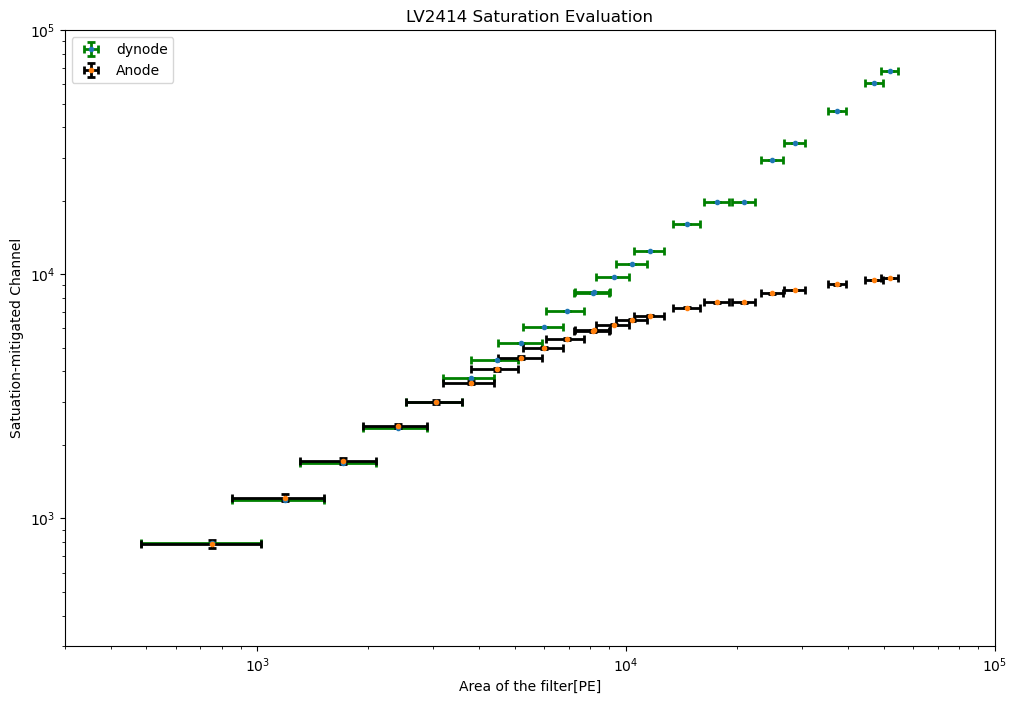

In [161]:

fig, ax = plt.subplots(figsize=(12,8))
ax.errorbar(df.filter_fix, df.dynode_fix, xerr=df.filter_fix_err, yerr=yerr_dynode_fix, fmt='.', ecolor='g', capsize=3, elinewidth=2, capthick=2, label='dynode')
#ax.errorbar(df.filter_fix , df.filter_fix, xerr=df.filter_fix_err, yerr=yerr_filter_fix, fmt='.', ecolor='black', capsize=3, elinewidth=2, capthick=2, label='filter')
ax.errorbar(df.filter_fix , df.Ch0_Area_mu, xerr=df.filter_fix_err, yerr=df.Ch0_Area_sigma,  fmt='.', ecolor='black', capsize=3, elinewidth=2, capthick=2, label='Anode')
ax.set_xlabel('Area of the filter[PE]')
ax.set_ylabel('Satuation-mitigated Channel')
ax.set_title('')
ax.set_xscale('log')
ax.set_yscale('log')
#ax.axhline(y=4000., color='b', linestyle='--')
#ax.axvline(x=4000, color='b', linestyle='--')
# ax.axvline(x=1000, color='b', linestyle='--', label='Area=1000PE')
#ax.axvline(x=3000, color='b', linestyle='--') 
ax.legend(loc='upper left')
#ax.set_xticks([500, 700, 1000, 2000, 3000, 4000, 5000, 7000, 10000])
#ax.set_xticklabels([500, 700, 1000, 2000, 3000, 4000, 5000, 7000,10000], rotation=45)
#ax.set_xticks(np.logspace(2, 4, 10+4))
#ax.set_xticklabels(np.logspace(2, 4, 10+4).astype(int), rotation=45)
# ax.grid()
#ax.set_ylim(0, 1.5)
ax.set_xlim(300, 100000)
ax.set_ylim(300, 100000)
ax.set_title('LV2414 Saturation Evaluation')
#plt.savefig(r'./figs/LV2414_saturation_eval_20240924.png',  bbox_inches='tight',  dpi=300)
# tick_positions = plt.xticks()[0]
# tick_positions_to_show = tick_positions[:10]  # 只取前15个位置作为展示的刻度位置
# plt.gca().set_xticks(tick_positions_to_show)  # 设置这些位置为刻度位置
plt.show()